In [1]:
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt

Metrics commonly used in Kaggle (binary classification) competitions:
- log_loss (punishes predictions that are confident and wrong far more)
- roc_auc_score (evaluate over all decision thresholds (see https://stackoverflow.com/a/34698935/5179470), note affected by class imbalance)

Indeed, analysing the effects of class imbalance indicate these are successful metrics, along with:
- cohen_kappa_score
- matthews_corrcoef

When you care more about precision or recall, see:
- "fbeta_score" `sklearn.metrics.fbeta_score(y_true, y_pred_labels, beta)` (beta < 1 favours precision, beta > 1 favors recall (beta -> 0 considers only precision, beta -> inf only recall).

# Determining the best possible predictions (and threshold(s)) from AUC and Precision-Recall Curves

In [2]:
y_true = np.array([0, 0, 1, 1])
y_pred = np.array([0.1, 0.4, 0.35, 0.8])

## AUC

roc_auc_score=0.75
[0.  0.5 0.5 1. ] [0.5 0.5 1.  1. ] [0.8  0.4  0.35 0.1 ]
0.75


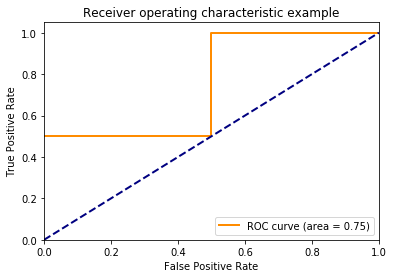

In [48]:
print("roc_auc_score={}".format(sklearn.metrics.roc_auc_score(y_true, y_pred)))

# Plot: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_pred)
print(fpr, tpr, thresholds)
roc_auc = sklearn.metrics.auc(fpr, tpr)
print(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Precision-Recall curve

average_precision_score=0.8333333333333333
[0.66666667 0.5        1.         1.        ] [1.  0.5 0.5 0. ] [0.35 0.4  0.8 ]


Text(0.5,1,'2-class Precision-Recall curve: AP=0.83')

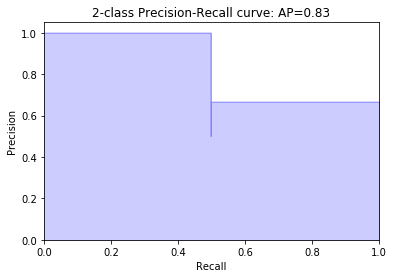

In [52]:
print("average_precision_score={}".format(sklearn.metrics.average_precision_score(y_true, y_pred)))

# Plot
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_pred)
print(precision, recall, thresholds)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          sklearn.metrics.average_precision_score(y_true, y_pred)))

# Analysing all metrics functions

In [7]:
# y_pred_labels computed assuming threshold = 0.5 (which produces the best AUC of 0.75 found above)
# see also https://stackoverflow.com/a/34698935/5179470
y_pred_labels = np.array([0, 0, 0, 1])  # recall original: [0.1, 0.4, 0.35, 0.8]

In [45]:
# LOSSES: better = 0

print("=== require y_pred === ")
print("brier_score_loss={}".format(sklearn.metrics.brier_score_loss(y_true, y_pred)))
print("hinge_loss={}".format(sklearn.metrics.hinge_loss(y_true, y_pred)))
print("log_loss={}".format(sklearn.metrics.log_loss(y_true, y_pred)))

print("\n=== require y_pred_labels === ")
print("hamming_loss={}".format(sklearn.metrics.hamming_loss(y_true, y_pred_labels)))
print("zero_one_loss={}".format(sklearn.metrics.zero_one_loss(y_true, y_pred_labels)))

=== require y_pred === 
brier_score_loss=0.15812500000000002
hinge_loss=0.8374999999999999
log_loss=0.47228795380917615

=== require y_pred_labels === 
hamming_loss=0.25
zero_one_loss=0.25


In [58]:
# SCORE: better = 1

print("=== require y_pred_labels === ")
print("accuracy_score={}".format(sklearn.metrics.accuracy_score(y_true, y_pred_labels)))
print("confusion_matrix={}".format(sklearn.metrics.confusion_matrix(y_true, y_pred_labels)))
print("classification_report=\n{}".format(sklearn.metrics.classification_report(y_true, y_pred_labels)))

print("cohen_kappa_score={}".format(sklearn.metrics.cohen_kappa_score(y_true, y_pred_labels)))
print("f1_score={}".format(sklearn.metrics.f1_score(y_true, y_pred_labels)))  # fbeta with beta=1
print("jaccard_similarity_score={}".format(sklearn.metrics.jaccard_similarity_score(y_true, y_pred_labels)))
print("matthews_corrcoef={}".format(sklearn.metrics.matthews_corrcoef(y_true, y_pred_labels)))

=== require y_pred_labels === 
accuracy_score=0.75
confusion_matrix=[[2 0]
 [1 1]]
classification_report=
             precision    recall  f1-score   support

          0       0.67      1.00      0.80         2
          1       1.00      0.50      0.67         2

avg / total       0.83      0.75      0.73         4

cohen_kappa_score=0.5
f1_score=0.6666666666666666
jaccard_similarity_score=0.75
matthews_corrcoef=0.5773502691896258


# Heavily imbalances classes

## Mostly "yes", mostly correct

In [61]:
y_true = np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_pred = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

roc_auc_score=0.5
[0. 1.] [0. 1.] [2 1]
0.5


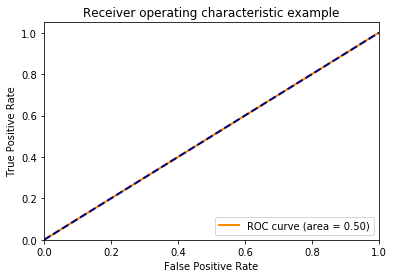

In [62]:
print("roc_auc_score={}".format(sklearn.metrics.roc_auc_score(y_true, y_pred)))

# Plot: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_pred)
print(fpr, tpr, thresholds)
roc_auc = sklearn.metrics.auc(fpr, tpr)
print(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

average_precision_score=0.96875
[0.96875 1.     ] [1. 0.] [1]


Text(0.5,1,'2-class Precision-Recall curve: AP=0.97')

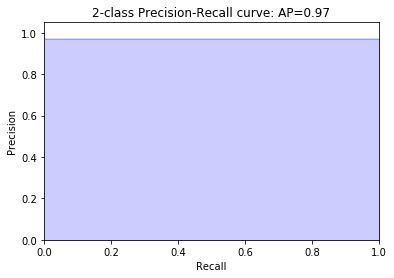

In [63]:
print("average_precision_score={}".format(sklearn.metrics.average_precision_score(y_true, y_pred)))

# Plot
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_pred)
print(precision, recall, thresholds)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          sklearn.metrics.average_precision_score(y_true, y_pred)))

In [64]:
y_pred_labels = y_pred

In [65]:
# LOSSES: better = 0

print("=== require y_pred === ")
print("brier_score_loss={}".format(sklearn.metrics.brier_score_loss(y_true, y_pred)))
print("hinge_loss={}".format(sklearn.metrics.hinge_loss(y_true, y_pred)))
print("log_loss={}".format(sklearn.metrics.log_loss(y_true, y_pred)))

print("\n=== require y_pred_labels === ")
print("hamming_loss={}".format(sklearn.metrics.hamming_loss(y_true, y_pred_labels)))
print("zero_one_loss={}".format(sklearn.metrics.zero_one_loss(y_true, y_pred_labels)))

=== require y_pred === 
brier_score_loss=0.03125
hinge_loss=0.0625
log_loss=1.0793617497606534

=== require y_pred_labels === 
hamming_loss=0.03125
zero_one_loss=0.03125


In [69]:
# SCORE: better = 1

print("=== require y_pred_labels === ")
print("accuracy_score={}".format(sklearn.metrics.accuracy_score(y_true, y_pred_labels)))
print("confusion_matrix={}".format(sklearn.metrics.confusion_matrix(y_true, y_pred_labels)))
print("classification_report=\n{}".format(sklearn.metrics.classification_report(y_true, y_pred_labels)))

print("cohen_kappa_score={}".format(sklearn.metrics.cohen_kappa_score(y_true, y_pred_labels)))
print("f1_score={}".format(sklearn.metrics.f1_score(y_true, y_pred_labels)))  # fbeta with beta=1
print("jaccard_similarity_score={}".format(sklearn.metrics.jaccard_similarity_score(y_true, y_pred_labels)))
print("matthews_corrcoef={}".format(sklearn.metrics.matthews_corrcoef(y_true, y_pred_labels)))

=== require y_pred_labels === 
accuracy_score=0.96875
confusion_matrix=[[ 0  1]
 [ 0 31]]
classification_report=
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.97      1.00      0.98        31

avg / total       0.94      0.97      0.95        32

cohen_kappa_score=0.0
f1_score=0.9841269841269841
jaccard_similarity_score=0.96875
matthews_corrcoef=0.0


/home/andyandy/git/sar-pipeline/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andyandy/git/sar-pipeline/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


## Mostly "yes", mostly incorrect

In [90]:
y_true = np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_pred = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

roc_auc_score=0.5
[0. 1.] [0. 1.] [1 0]
0.5


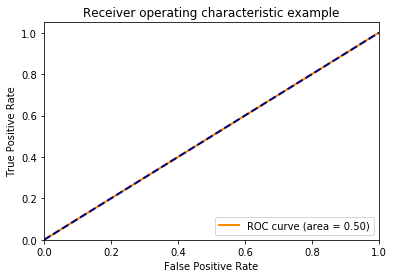

In [91]:
print("roc_auc_score={}".format(sklearn.metrics.roc_auc_score(y_true, y_pred)))

# Plot: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_pred)
print(fpr, tpr, thresholds)
roc_auc = sklearn.metrics.auc(fpr, tpr)
print(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

average_precision_score=0.96875
[0.96875 1.     ] [1. 0.] [0]


Text(0.5,1,'2-class Precision-Recall curve: AP=0.97')

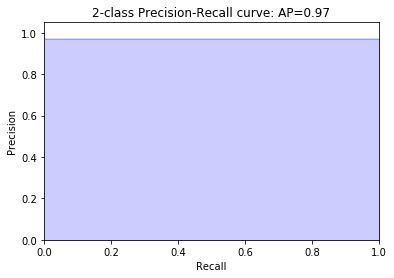

In [92]:
print("average_precision_score={}".format(sklearn.metrics.average_precision_score(y_true, y_pred)))

# Plot
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_pred)
print(precision, recall, thresholds)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          sklearn.metrics.average_precision_score(y_true, y_pred)))

In [81]:
y_pred_labels = y_pred

In [82]:
# LOSSES: better = 0

print("=== require y_pred === ")
print("brier_score_loss={}".format(sklearn.metrics.brier_score_loss(y_true, y_pred)))
print("hinge_loss={}".format(sklearn.metrics.hinge_loss(y_true, y_pred)))
print("log_loss={}".format(sklearn.metrics.log_loss(y_true, y_pred)))

print("\n=== require y_pred_labels === ")
print("hamming_loss={}".format(sklearn.metrics.hamming_loss(y_true, y_pred_labels)))
print("zero_one_loss={}".format(sklearn.metrics.zero_one_loss(y_true, y_pred_labels)))

=== require y_pred === 
brier_score_loss=0.96875
hinge_loss=1.0
log_loss=33.459439632569726

=== require y_pred_labels === 
hamming_loss=0.96875
zero_one_loss=0.96875


In [83]:
# SCORE: better = 1

print("=== require y_pred_labels === ")
print("accuracy_score={}".format(sklearn.metrics.accuracy_score(y_true, y_pred_labels)))
print("confusion_matrix={}".format(sklearn.metrics.confusion_matrix(y_true, y_pred_labels)))
print("classification_report=\n{}".format(sklearn.metrics.classification_report(y_true, y_pred_labels)))

print("cohen_kappa_score={}".format(sklearn.metrics.cohen_kappa_score(y_true, y_pred_labels)))
print("f1_score={}".format(sklearn.metrics.f1_score(y_true, y_pred_labels)))  # fbeta with beta=1
print("jaccard_similarity_score={}".format(sklearn.metrics.jaccard_similarity_score(y_true, y_pred_labels)))
print("matthews_corrcoef={}".format(sklearn.metrics.matthews_corrcoef(y_true, y_pred_labels)))

=== require y_pred_labels === 
accuracy_score=0.03125
confusion_matrix=[[ 1  0]
 [31  0]]
classification_report=
             precision    recall  f1-score   support

          0       0.03      1.00      0.06         1
          1       0.00      0.00      0.00        31

avg / total       0.00      0.03      0.00        32

cohen_kappa_score=0.0
f1_score=0.0
jaccard_similarity_score=0.03125
matthews_corrcoef=0.0


/home/andyandy/git/sar-pipeline/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andyandy/git/sar-pipeline/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andyandy/git/sar-pipeline/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


## Mostly "no", mostly correct

In [72]:
y_true = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
y_pred = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

roc_auc_score=0.5
[0. 1.] [0. 1.] [1 0]
0.5


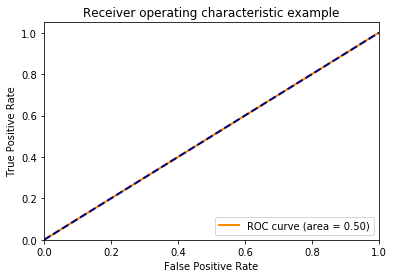

In [73]:
print("roc_auc_score={}".format(sklearn.metrics.roc_auc_score(y_true, y_pred)))

# Plot: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_pred)
print(fpr, tpr, thresholds)
roc_auc = sklearn.metrics.auc(fpr, tpr)
print(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

average_precision_score=0.03125
[0.03125 1.     ] [1. 0.] [0]


Text(0.5,1,'2-class Precision-Recall curve: AP=0.03')

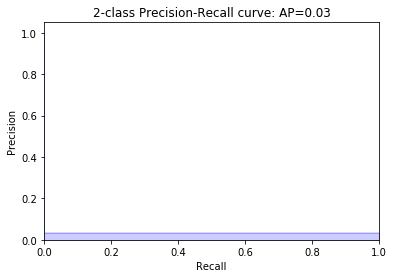

In [74]:
print("average_precision_score={}".format(sklearn.metrics.average_precision_score(y_true, y_pred)))

# Plot
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_pred)
print(precision, recall, thresholds)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          sklearn.metrics.average_precision_score(y_true, y_pred)))

In [75]:
y_pred_labels = y_pred

In [76]:
# LOSSES: better = 0

print("=== require y_pred === ")
print("brier_score_loss={}".format(sklearn.metrics.brier_score_loss(y_true, y_pred)))
print("hinge_loss={}".format(sklearn.metrics.hinge_loss(y_true, y_pred)))
print("log_loss={}".format(sklearn.metrics.log_loss(y_true, y_pred)))

print("\n=== require y_pred_labels === ")
print("hamming_loss={}".format(sklearn.metrics.hamming_loss(y_true, y_pred_labels)))
print("zero_one_loss={}".format(sklearn.metrics.zero_one_loss(y_true, y_pred_labels)))

=== require y_pred === 
brier_score_loss=0.03125
hinge_loss=1.0
log_loss=1.0793367623409598

=== require y_pred_labels === 
hamming_loss=0.03125
zero_one_loss=0.03125


In [77]:
# SCORE: better = 1

print("=== require y_pred_labels === ")
print("accuracy_score={}".format(sklearn.metrics.accuracy_score(y_true, y_pred_labels)))
print("confusion_matrix={}".format(sklearn.metrics.confusion_matrix(y_true, y_pred_labels)))
print("classification_report=\n{}".format(sklearn.metrics.classification_report(y_true, y_pred_labels)))

print("cohen_kappa_score={}".format(sklearn.metrics.cohen_kappa_score(y_true, y_pred_labels)))
print("f1_score={}".format(sklearn.metrics.f1_score(y_true, y_pred_labels)))  # fbeta with beta=1
print("jaccard_similarity_score={}".format(sklearn.metrics.jaccard_similarity_score(y_true, y_pred_labels)))
print("matthews_corrcoef={}".format(sklearn.metrics.matthews_corrcoef(y_true, y_pred_labels)))

=== require y_pred_labels === 
accuracy_score=0.96875
confusion_matrix=[[31  0]
 [ 1  0]]
classification_report=
             precision    recall  f1-score   support

          0       0.97      1.00      0.98        31
          1       0.00      0.00      0.00         1

avg / total       0.94      0.97      0.95        32

cohen_kappa_score=0.0
f1_score=0.0
jaccard_similarity_score=0.96875
matthews_corrcoef=0.0


/home/andyandy/git/sar-pipeline/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andyandy/git/sar-pipeline/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andyandy/git/sar-pipeline/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


## Mostly "no", mostly incorrect

In [84]:
y_true = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
y_pred = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

roc_auc_score=0.5
[0. 1.] [0. 1.] [2 1]
0.5


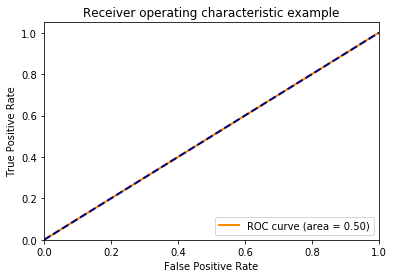

In [85]:
print("roc_auc_score={}".format(sklearn.metrics.roc_auc_score(y_true, y_pred)))

# Plot: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_pred)
print(fpr, tpr, thresholds)
roc_auc = sklearn.metrics.auc(fpr, tpr)
print(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

average_precision_score=0.03125
[0.03125 1.     ] [1. 0.] [1]


Text(0.5,1,'2-class Precision-Recall curve: AP=0.03')

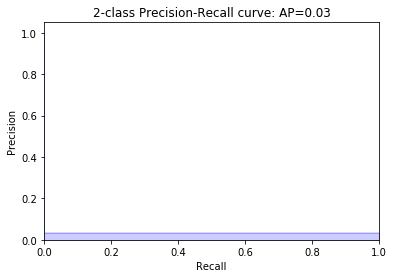

In [86]:
print("average_precision_score={}".format(sklearn.metrics.average_precision_score(y_true, y_pred)))

# Plot
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_pred)
print(precision, recall, thresholds)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          sklearn.metrics.average_precision_score(y_true, y_pred)))

In [87]:
y_pred_labels = y_pred

In [88]:
# LOSSES: better = 0

print("=== require y_pred === ")
print("brier_score_loss={}".format(sklearn.metrics.brier_score_loss(y_true, y_pred)))
print("hinge_loss={}".format(sklearn.metrics.hinge_loss(y_true, y_pred)))
print("log_loss={}".format(sklearn.metrics.log_loss(y_true, y_pred)))

print("\n=== require y_pred_labels === ")
print("hamming_loss={}".format(sklearn.metrics.hamming_loss(y_true, y_pred_labels)))
print("zero_one_loss={}".format(sklearn.metrics.zero_one_loss(y_true, y_pred_labels)))

=== require y_pred === 
brier_score_loss=0.96875
hinge_loss=1.9375
log_loss=33.46021424258022

=== require y_pred_labels === 
hamming_loss=0.96875
zero_one_loss=0.96875


In [89]:
# SCORE: better = 1

print("=== require y_pred_labels === ")
print("accuracy_score={}".format(sklearn.metrics.accuracy_score(y_true, y_pred_labels)))
print("confusion_matrix={}".format(sklearn.metrics.confusion_matrix(y_true, y_pred_labels)))
print("classification_report=\n{}".format(sklearn.metrics.classification_report(y_true, y_pred_labels)))

print("cohen_kappa_score={}".format(sklearn.metrics.cohen_kappa_score(y_true, y_pred_labels)))
print("f1_score={}".format(sklearn.metrics.f1_score(y_true, y_pred_labels)))  # fbeta with beta=1
print("jaccard_similarity_score={}".format(sklearn.metrics.jaccard_similarity_score(y_true, y_pred_labels)))
print("matthews_corrcoef={}".format(sklearn.metrics.matthews_corrcoef(y_true, y_pred_labels)))

=== require y_pred_labels === 
accuracy_score=0.03125
confusion_matrix=[[ 0 31]
 [ 0  1]]
classification_report=
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        31
          1       0.03      1.00      0.06         1

avg / total       0.00      0.03      0.00        32

cohen_kappa_score=0.0
f1_score=0.06060606060606061
jaccard_similarity_score=0.03125
matthews_corrcoef=0.0


/home/andyandy/git/sar-pipeline/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andyandy/git/sar-pipeline/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
